<a href="https://colab.research.google.com/github/Jayesh2726/Brain-Tumor-Detection-System/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
from PIL import Image
import numpy as np
image_directory = '/content/drive/MyDrive/Tumor Images/Dataset/'
no_tumor_images = os.listdir(image_directory+ 'no/')
dataset =[]
label = []

for i, image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(image_directory + 'no/' + image_name)
    image =Image.fromarray(image,'RGB')
    image =image.resize((64,64))
    dataset.append(np.array(image))
    label.append(0)



/tmp/ipython-input-209317930.py:13: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image =Image.fromarray(image,'RGB')


In [ ]:
yes_tumor_images = os.listdir(image_directory+ 'yes/')
for i, image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(image_directory + 'yes/' + image_name)
    image =Image.fromarray(image,'RGB')
    image =image.resize((64,64))
    dataset.append(np.array(image))
    label.append(1)

/tmp/ipython-input-1967117231.py:5: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image =Image.fromarray(image,'RGB')


In [ ]:
print(dataset)
print(label)

[array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [2, 2, 2],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8), array([[[ 5,  5,  5],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 3,  3,  3]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
       

In [ ]:
print(len(label))

3000


In [ ]:
print(len(dataset))

3000


#Convert DataSet into Numpy array

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset,label,test_size=0.2,random_state=42)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

# Reshape = (n, image_width, image_height, n_channels)



# Normalize the data

In [ ]:
from keras.utils import normalize
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
x_train = normalize(x_train,axis=1)
x_test = normalize(x_test,axis=1)

# Model Buliding

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Binary Classification
# Binary CrossEntropy = 1, use sigmoid
# Categorical Entropy = 2, use softmax
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=16,
          verbose=1,
          epochs=10,
          validation_data=(x_test,y_test),
          shuffle=False)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6934 - loss: 0.5939 - val_accuracy: 0.8217 - val_loss: 0.4303
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.8071 - loss: 0.4359 - val_accuracy: 0.8650 - val_loss: 0.3290
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.8353 - loss: 0.3564 - val_accuracy: 0.8833 - val_loss: 0.2615
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8836 - loss: 0.2748 - val_accuracy: 0.9367 - val_loss: 0.1945
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9150 - loss: 0.2238 - val_accuracy: 0.9433 - val_loss: 0.1545
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9427 - loss: 0.1514 - val_accuracy: 0.9583 - val_loss: 0.1187
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9641 - loss: 0.1142 - val_accuracy: 0.9567 - val_loss: 0.1073
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9678 - loss: 0.0921 - 

In [ ]:
model.save('BrainTumor10Epochs.h5')

In [ ]:
from keras.utils import to_categorical

# Test The Model

In [ ]:
from keras.models import load_model
model = load_model('BrainTumor10Epochs.h5')

In [ ]:
from PIL import Image
image = cv2.imread('/content/drive/MyDrive/Tumor Images/pred/pred0.jpg')
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)

In [ ]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
from PIL import Image
image = cv2.imread('/content/drive/MyDrive/Tumor Images/pred/pred5.jpg')
img2 = Image.fromarray(image)
img2 = img.resize((64,64))
img2 = np.array(img)

In [ ]:
print(img2)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [76 76 90 ... 83 83 83]
 [83 87 87 ...  0  0  0]
 [ 0  0  0 ... 76 76 80]]


In [ ]:
input_img =np.expand_dims(img,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Prediction: 0.9977
Result: Tumor Detected


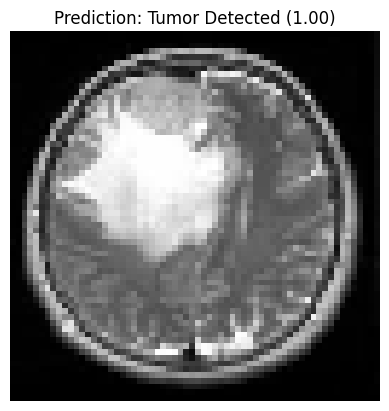

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming the model expects a 200x200 RGB image
TARGET_SIZE = (64, 64)

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=TARGET_SIZE, color_mode='rgb') # Changed to 'rgb'
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array = img_array / 255.0 # Normalize pixel values to [0, 1], if your model was trained this way
    return img_array

# Path to the image you want to test
# IMPORTANT: Replace this with the actual path to your test image
# For example: '/content/drive/MyDrive/Photo.jpg'
image_path = '/content/drive/MyDrive/Tumor Images/pred/pred5.jpg'

# Check if the model is loaded
if 'model' in locals():
    # Preprocess the image
    processed_image = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(processed_image)

    # Assuming it's a binary classification model (e.g., tumor/no tumor)
    # You might need to adjust this part based on your model's output layer and classes
    if prediction[0][0] > 0.5:
        result = "Tumor Detected"
    else:
        result = "No Tumor Detected"

    print(f"Prediction: {prediction[0][0]:.4f}")
    print(f"Result: {result}")

    # Display the image
    img_display = image.load_img(image_path, target_size=TARGET_SIZE, color_mode='rgb') # Changed to 'rgb' for display as well
    plt.imshow(img_display)
    plt.title(f"Prediction: {result} ({prediction[0][0]:.2f})")
    plt.axis('off')
    plt.show()
else:
    print("Model not loaded. Please execute the cell that loads the model first.")